In [10]:
# Following tutorial from https://github.com/jeshraghian/snntorch/blob/master/examples/tutorial_1_spikegen.ipynb
import snntorch as snn
import torch
from torchvision import datasets, transforms

In [8]:
# Pain in the ass, just download from kaggle
# trainset = torchvision.datasets.MNIST("./data/", train=True, transform=transforms.ToTensor(), download=True)

NameError: name 'transforms' is not defined

In [12]:
# Training Parameters
batch_size=128
data_path='./data/mnist'
num_classes = 10  # MNIST has 10 output classes

# Torch Variables
dtype = torch.float

In [13]:
# Define a transform
transform = transforms.Compose([
            transforms.Resize((28,28)),
            transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize((0,), (1,))])

mnist_train = datasets.MNIST(data_path, train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw


In [14]:
from snntorch import utils

subset = 10
mnist_train = utils.data_subset(mnist_train, subset)
print(f"The size of mnist_train is {len(mnist_train)}")

The size of mnist_train is 6000


In [15]:
from torch.utils.data import DataLoader

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

In [22]:
# ------ Bernoulli example -------
# Temporal Dynamics
num_steps = 100

# create vector filled with 0.5
raw_vector = torch.ones(num_steps)*0.5

# pass each sample through a Bernoulli trial
rate_coded_vector = torch.bernoulli(raw_vector)
print(f"Converted vector: {rate_coded_vector}")

print(f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time.")

Converted vector: tensor([0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 1.])
The output is spiking 42.00% of the time.


In [25]:
# ----- Rate Coding -----
from snntorch import spikegen

# Iterate through minibatches
data = iter(train_loader)
data_it, targets_it = next(data)

# Spiking Data
spike_data = spikegen.rate(data_it, num_steps=num_steps)
print(spike_data.size())

torch.Size([100, 128, 1, 28, 28])


In [26]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML

spike_data_sample = spike_data[:, 0, 0]
print(spike_data_sample.size())

torch.Size([100, 28, 28])


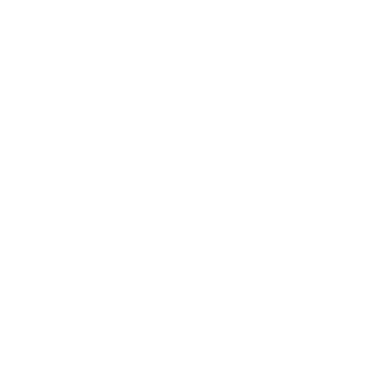

In [28]:
fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample, fig, ax)
# plt.rcParams['animation.ffmpeg_path'] = 'C:\\path\\to\\your\\ffmpeg.exe'

HTML(anim.to_html5_video())